# Assignment 4

Before working on this assignment please read these instructions fully. In the submission area, you will notice that you can click the link to **Preview the Grading** for each step of the assignment. This is the criteria that will be used for peer grading. Please familiarize yourself with the criteria before beginning the assignment.

This assignment requires that you to find **at least** two datasets on the web which are related, and that you visualize these datasets to answer a question with the broad topic of **religious events or traditions** (see below) for the region of **Ann Arbor, Michigan, United States**, or **United States** more broadly.

You can merge these datasets with data from different regions if you like! For instance, you might want to compare **Ann Arbor, Michigan, United States** to Ann Arbor, USA. In that case at least one source file must be about **Ann Arbor, Michigan, United States**.

You are welcome to choose datasets at your discretion, but keep in mind **they will be shared with your peers**, so choose appropriate datasets. Sensitive, confidential, illicit, and proprietary materials are not good choices for datasets for this assignment. You are welcome to upload datasets of your own as well, and link to them using a third party repository such as github, bitbucket, pastebin, etc. Please be aware of the Coursera terms of service with respect to intellectual property.

Also, you are welcome to preserve data in its original language, but for the purposes of grading you should provide english translations. You are welcome to provide multiple visuals in different languages if you would like!

As this assignment is for the whole course, you must incorporate principles discussed in the first week, such as having as high data-ink ratio (Tufte) and aligning with Cairo’s principles of truth, beauty, function, and insight.

Here are the assignment instructions:

 * State the region and the domain category that your data sets are about (e.g., **Ann Arbor, Michigan, United States** and **religious events or traditions**).
 * You must state a question about the domain category and region that you identified as being interesting.
 * You must provide at least two links to available datasets. These could be links to files such as CSV or Excel files, or links to websites which might have data in tabular form, such as Wikipedia pages.
 * You must upload an image which addresses the research question you stated. In addition to addressing the question, this visual should follow Cairo's principles of truthfulness, functionality, beauty, and insightfulness.
 * You must contribute a short (1-2 paragraph) written justification of how your visualization addresses your stated research question.

What do we mean by **religious events or traditions**?  For this category you might consider calendar events, demographic data about religion in the region and neighboring regions, participation in religious events, or how religious events relate to political events, social movements, or historical events.

## Tips
* Wikipedia is an excellent source of data, and I strongly encourage you to explore it for new data sources.
* Many governments run open data initiatives at the city, region, and country levels, and these are wonderful resources for localized data sources.
* Several international agencies, such as the [United Nations](http://data.un.org/), the [World Bank](http://data.worldbank.org/), the [Global Open Data Index](http://index.okfn.org/place/) are other great places to look for data.
* This assignment requires you to convert and clean datafiles. Check out the discussion forums for tips on how to do this from various sources, and share your successes with your fellow students!

## Example
Looking for an example? Here's what our course assistant put together for the **Ann Arbor, MI, USA** area using **sports and athletics** as the topic. [Example Solution File](./readonly/Assignment4_example.pdf)

## Region and Domain

United States <br>
Religious Events or Traditions<br>

## Question

Do regions in the US that have a lesser percentage of the population considering religion as important have more happiness index?

## DataSets
https://en.wikipedia.org/wiki/List_of_U.S._states_and_territories_by_religiosity

https://www.livescience.com/61744-happiest-states-2017-full-list.html (Original Citation:  https://www.gallup.com/home.aspx )


In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
from scipy.stats import pearsonr

%matplotlib notebook

In [13]:
def readHappinessIndexTxtFile(filename):
    header = ['State', 'Happiness Score']
    rows = []
    with open(filename, 'r') as f:
        for line in f:
            state = line[:-5].strip()
            score = line[-5:-1].strip()
            rows.append([state, score])
            
    f.close()
    
    return pd.DataFrame(data = rows,  columns = header)

hpi_df = readHappinessIndexTxtFile('hpi_2017.txt')
hpi_df.head()

,State,Happiness Score
0,South Dakota,64.1
1,Vermont,64.1
2,Hawaii,63.4
3,Minnesota,63.1
4,North Dakota,63.1


In [14]:
def readReligiosityTxtFile(filename):
    header = []
    rows = []
    with open(filename, 'r') as f:
        for i in range(0,2):
            header.append(next(f)[:-1])
        for line in f:
            rows.append(line)
   
    # print(header)
    cols = ["State, Territory or District", "Overall Religiosity Rank", "Believe in God with Certainty", "Consider Religion Important", "Pray Daily", "Attend Weekly Worship Services"]
    return pd.DataFrame(data = [row.strip().split('\t') for row in rows], columns = cols)

religiosity_df = readReligiosityTxtFile('religiosity_2017.txt')
religiosity_df.head()

,"State, Territory or District",Overall Religiosity Rank,Believe in God with Certainty,Consider Religion Important,Pray Daily,Attend Weekly Worship Services
0,Alabama,1,82%,77%,73%,51%
1,Alaska,44,55%,41%,49%,30%
2,Arizona,27,62%,51%,55%,34%
3,Arkansas,5,77%,70%,65%,41%
4,California,35,54%,47%,51%,31%


In [15]:
df = pd.merge(hpi_df, religiosity_df, how = "inner", left_on = "State", right_on = "State, Territory or District")
df.drop(['State, Territory or District'], axis = 1, inplace = True)
df.set_index('State', inplace = True)
df = df.applymap(lambda x: re.sub("%", "", x)).sort_index()
df = df.applymap(lambda x: float(x))
df.head()

,Happiness Score,Overall Religiosity Rank,Believe in God with Certainty,Consider Religion Important,Pray Daily,Attend Weekly Worship Services
State,,,,,,
Alabama,60.8,1.0,82.0,77.0,73.0,51.0
Alaska,61.6,44.0,55.0,41.0,49.0,30.0
Arizona,62.2,27.0,62.0,51.0,55.0,34.0
Arkansas,59.4,5.0,77.0,70.0,65.0,41.0
California,62.3,35.0,54.0,47.0,51.0,31.0


<IPython.core.display.Javascript object>


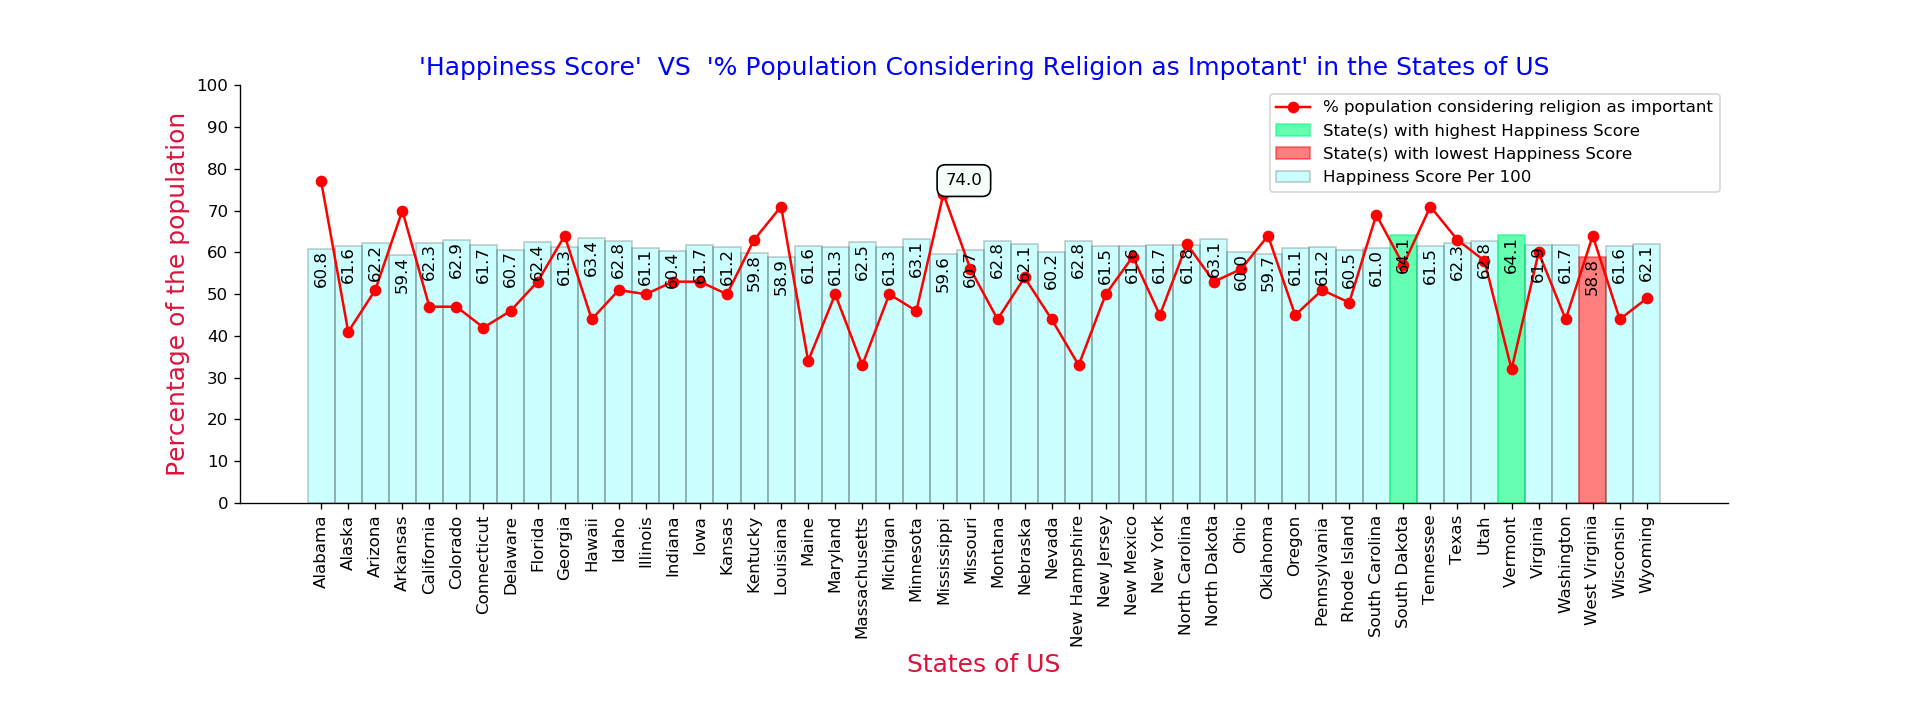

In [21]:
plt.figure(figsize = (16, 6))

def drawGraph():
    ax = plt.gca()
    ax.set_xticks(np.arange(0,50,1))
    ax.set_xticklabels(df.index, rotation = "vertical", fontsize = 10)
    ax.set_ylim(0, 100)
    ylabels = np.arange(0, 110, 10)
    ax.set_yticks(np.arange(0, 110, 10))
    ax.set_yticklabels(ylabels, fontsize = 10)
    line, = plt.plot(df['Consider Religion Important'], '-o', color = "Red", picker = 5, label = "% population considering religion as important")
    
    bars = plt.bar(np.arange(0,50,1), df['Happiness Score'], alpha = 0.2, color = "cyan", edgecolor = "black", width = 1, label = "Happiness Score Per 100");
    
    for bar in bars:
        ax.text(bar.get_x() + bar.get_width()/2, bar.get_height() - 9, str(bar.get_height()), ha = "center", va = "bottom", color = "black", rotation = 90, fontsize = 10)
        
    low_hs = df['Happiness Score'].idxmin()
    high_hs = df['Happiness Score'].idxmax()
    
    lf = False
    hf = False
    for bar in bars:
        if(bar.get_height() == df.loc[high_hs]['Happiness Score']):
            bar.set_color("springgreen")
            bar.set_alpha(0.6)
            if not hf:
                bar.set_label("State(s) with highest Happiness Score")
                hf = True
        if(bar.get_height() == df.loc[low_hs]['Happiness Score']):
            bar.set_color("red")
            bar.set_alpha(0.5)
            if not lf:
                bar.set_label("State(s) with lowest Happiness Score")
                lf = True
        
    ax.set_xlabel('States of US', fontsize = 15, color = "crimson")
    ax.set_ylabel('Percentage of the population', fontsize = 15,color = "crimson")
    ax.set_title("'Happiness Score'  VS  '% Population Considering Religion as Impotant' in the States of US", fontsize = 15, color = "blue")
    
    ax.legend()
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    plt.subplots_adjust(bottom = 0.3)
    
    plt.savefig('HappinessVSReligion.png')

drawGraph()

def onpick(event):
    plt.clf()
    this_line = event.artist
    x,y = event.mouseevent.xdata, event.mouseevent.ydata
    x_data = this_line.get_xdata()
    y_data = this_line.get_ydata()
    ind = event.ind
    drawGraph()
    plt.gca().text(x, y+3, y_data[ind][0], bbox = dict(facecolor = "mintcream", edgecolor = "black", boxstyle = "round", pad = 0.5))

plt.gcf().canvas.mpl_connect('pick_event', onpick);

In [19]:
corr, _ = pearsonr(df["Consider Religion Important"], df["Happiness Score"])
corr

-0.5161994903441154

## Conclusion

       The plot indicates how happiness factor changes in the states of the US with the percentage of the population believing religion is important during 2017. The line plot shows the trend in the population percentage of religious belief in the states of the US and the bar plot shows the happiness scores out of 100 for each state. The Pearson correlation between Religion Importance and Happiness Score is -0.52 which shows that there is a moderate correlation between both of them and the negative sign indicates that both factors are inversely proportional to each other. We can observe from the visualization that the state with the lowest percentage of the population believing religion as important has the highest happiness index which answers our question.
       
       
## Cairo's Principles

### 1. Truthfulness
        The graph depicts only the required information by avoiding unwanted junk. It can be seen that the creator did not hide any data or did not create misleading interpretations of the data, but shown the data in the most understandable manner with necessary titles, legend, and labels.
        
### 2. Beauty
        The beauty of the graph is maintained by removing unnecessary chart junk, selecting a reasonable font size, and colors with visible opacity.

### 3. Functionality
        The plot is interactive where the audience can get the exact percentage of the population by clicking on the line plot and happiness scores for each state are annotated on the respective bar chart.
        
### 4. Insightfulness
        Correlation Factor and the Graph clearly depict the relationship between the happiness index and the percentage of the population believing religion as important. 
